<a href="https://colab.research.google.com/github/Hanugnajarugumalli/Projects-/blob/main/Covid_19_Vaccination_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the Data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/covid_vaccine_statewise.csv')
print(df.head())
df['Updated On'] = pd.to_datetime(df['Updated On'], format='%d/%m/%Y')


   Updated On  State  Total Doses Administered  Sessions   Sites   \
0  16/01/2021  India                   48276.0    3455.0   2957.0   
1  17/01/2021  India                   58604.0    8532.0   4954.0   
2  18/01/2021  India                   99449.0   13611.0   6583.0   
3  19/01/2021  India                  195525.0   17855.0   7951.0   
4  20/01/2021  India                  251280.0   25472.0  10504.0   

   First Dose Administered  Second Dose Administered  \
0                  48276.0                       0.0   
1                  58604.0                       0.0   
2                  99449.0                       0.0   
3                 195525.0                       0.0   
4                 251280.0                       0.0   

   Male (Doses Administered)  Female (Doses Administered)  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3   

Handling Missing Values

In [ ]:

print(df.isnull().sum())
df.fillna(0, inplace=True)

# Option 2: Drop rows with missing values (if appropriate)
# df.dropna(inplace=True)


Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

Total Doses Administered Over Time

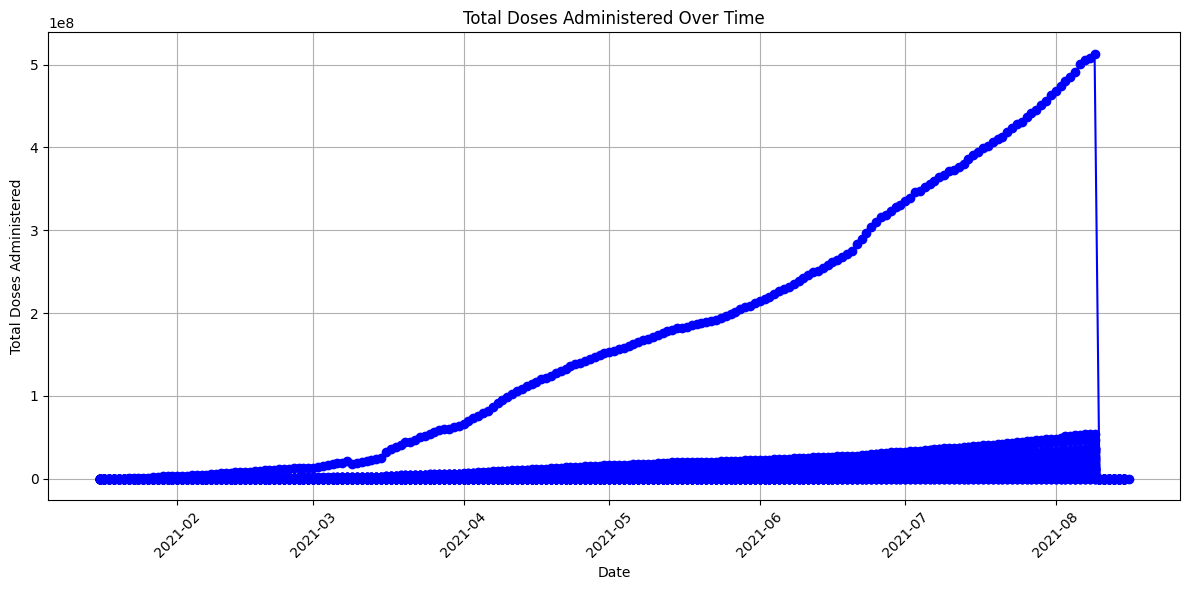

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Updated On'], df['Total Doses Administered'], marker='o', color='b')
plt.title('Total Doses Administered Over Time')
plt.xlabel('Date')
plt.ylabel('Total Doses Administered')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Total Doses Administered by State


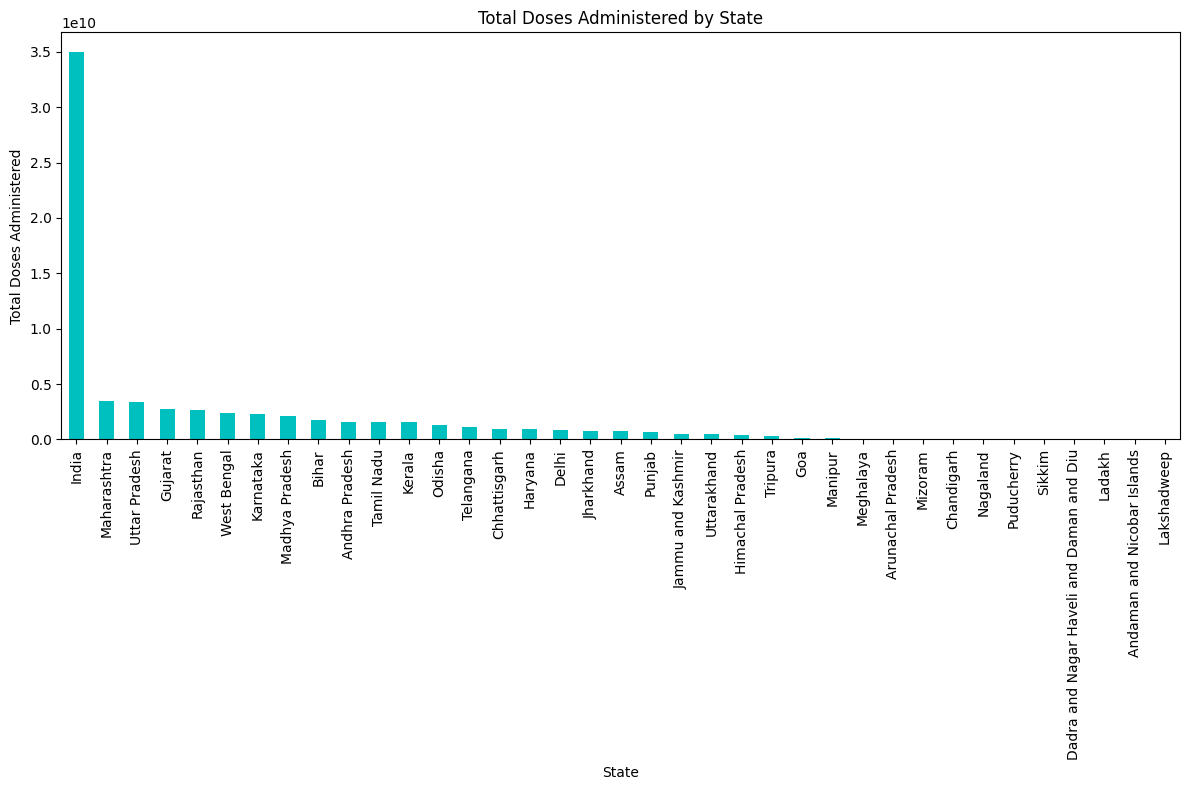

In [ ]:
# Assuming 'State' column has multiple states
state_totals = df.groupby('State')['Total Doses Administered'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
state_totals.plot(kind='bar', color='c')
plt.title('Total Doses Administered by State')
plt.xlabel('State')
plt.ylabel('Total Doses Administered')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Doses Administered by Vaccine Type

Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions', 'Sites',
       'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', 'Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')


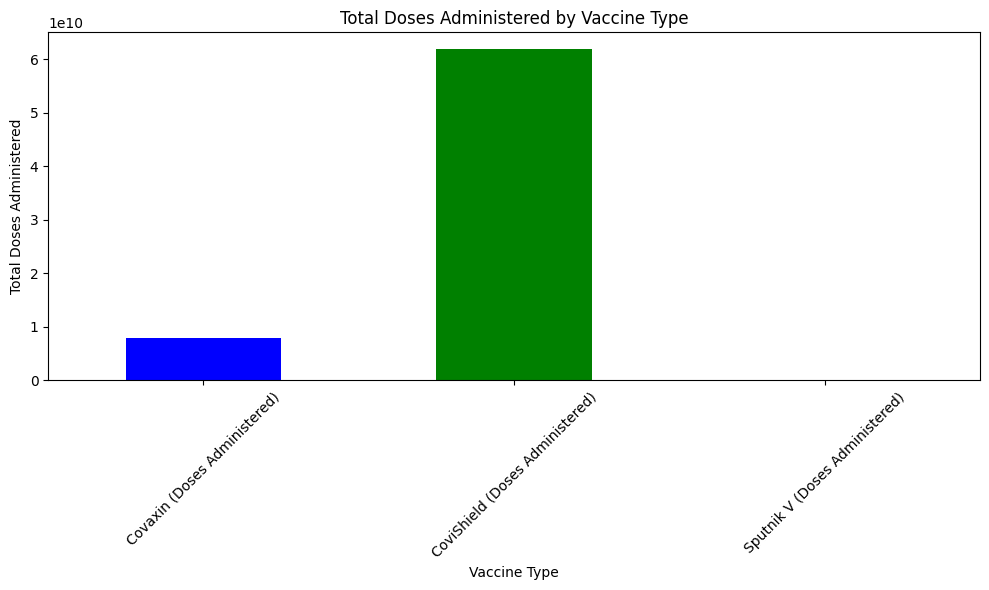

In [ ]:
import matplotlib.pyplot as plt

# Ensure column names are correct and without extra spaces
df.columns = df.columns.str.strip()

# Print column names to check if they are correct
print(df.columns)

# Check if columns exist
vaccine_columns = ['Covaxin (Doses Administered)', 'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)']
for col in vaccine_columns:
    if col not in df.columns:
        print(f"Column {col} not found in DataFrame")

# Summing up doses administered by vaccine type
vaccine_totals = df[vaccine_columns].sum()

plt.figure(figsize=(10, 6))
vaccine_totals.plot(kind='bar', color=['b', 'g', 'r'])
plt.title('Total Doses Administered by Vaccine Type')
plt.xlabel('Vaccine Type')
plt.ylabel('Total Doses Administered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Number of Individuals Vaccinated by Age Group

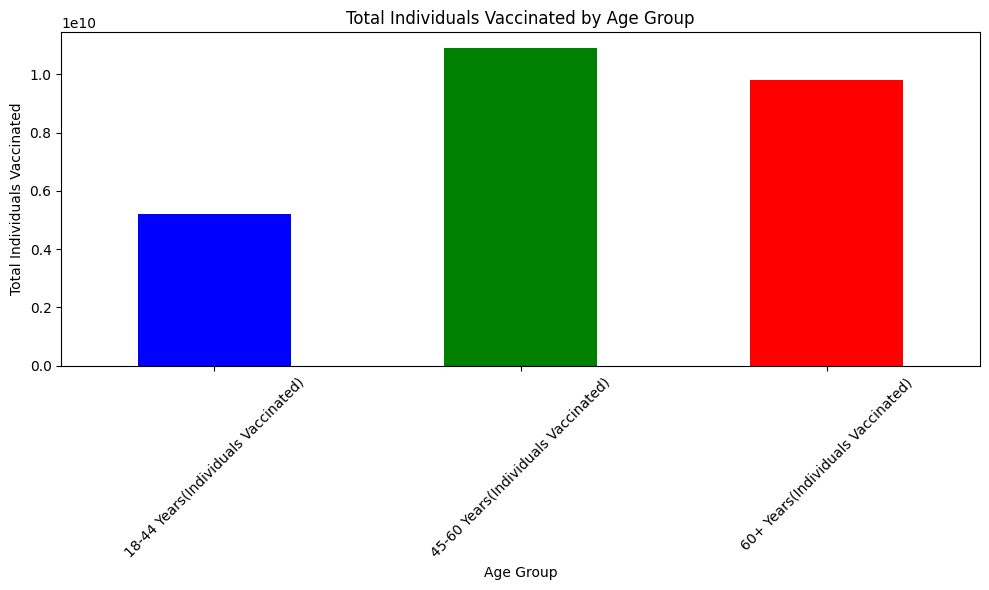

In [ ]:

age_groups = df[['18-44 Years(Individuals Vaccinated)', '45-60 Years(Individuals Vaccinated)', '60+ Years(Individuals Vaccinated)']].sum()

plt.figure(figsize=(10, 6))
age_groups.plot(kind='bar', color=['b', 'g', 'r'])
plt.title('Total Individuals Vaccinated by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Individuals Vaccinated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


AEFI (Adverse Events Following Immunization) Reported

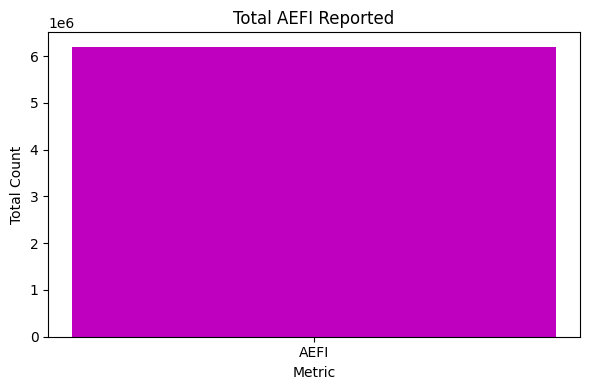

In [ ]:
import matplotlib.pyplot as plt

# Check if 'AEFI' column exists and handle missing values
if 'AEFI' in df.columns:
    # Fill NaN values with 0 if necessary
    df['AEFI'] = df['AEFI'].fillna(0)

    # Sum up AEFI reported
    total_aefi = df['AEFI'].sum()

    # Plotting the total AEFI reported
    plt.figure(figsize=(6, 4))
    plt.bar(['AEFI'], [total_aefi], color='m')
    plt.title('Total AEFI Reported')
    plt.xlabel('Metric')
    plt.ylabel('Total Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'AEFI' not found in the DataFrame.")



                           Conclusion


Based on the analysis of the COVID-19 vaccination data, it is evident that the vaccination campaign has achieved significant progress, with a substantial increase in the total number of doses administered over time. States such as Maharasthra, Uttar Pradesh,Gujarat,Rjasthan,Westbengal have demonstrated higher vaccination coverage, reflecting effective distribution and outreach efforts. Conversely, states like Nagaland,sikkim,Ladakh etc show lower vaccination rates, indicating potential challenges that need addressing. The analysis also reveals that vaccines such as  CoviShield are more widely administered compared to others like Sputnik V and higher vaccination coverage is observed among older age groups compared to younger ones. Additionally, the reported adverse events (AEFI) are within manageable limits, highlighting the overall safety of the vaccination program. These insights underscore the need for targeted interventions to address regional and demographic disparities and ensure equitable and effective vaccination coverage.